In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3420,spam,Welcome! Please reply with your AGE and GENDER...,NaN,NaN,NaN
2660,ham,Want to finally have lunch today?,NaN,NaN,NaN
1454,ham,Can Ì_ all decide faster cos my sis going home...,NaN,NaN,NaN
4429,ham,Yar lor... How u noe? U used dat route too?,NaN,NaN,NaN
3552,ham,Din i tell u jus now 420,NaN,NaN,NaN


In [3]:
#Check Shape (# of Rows and Columns in DataFrame)
df.shape

(5572, 5)

## Steps:

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Check Missing (NaN) Values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
2124,ham,Beautiful Truth against Gravity.. Read careful...
1236,ham,How much are we getting?
4633,ham,These won't do. Have to move on to morphine
415,ham,Whatsup there. Dont u want to sleep
40,ham,Pls go ahead with watts. I just wanted to be s...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2827,ham,Wife.how she knew the time of murder exactly
599,ham,I'm going out to buy mum's present ar.
4706,ham,Wif my family booking tour package.
1683,ham,Already am squatting is the new way of walking
214,ham,Sounds great! Are you home now?


In [9]:
#LabelEncoder can be used to normalize labels. 
#It can be used to transform non-numerical labels (Ham, Spam) to numerical labels
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.sample(5)

,target,text
4289,0,"For you information, IKEA is spelled with all ..."
5210,0,Dai i downloaded but there is only exe file wh...
5141,1,FREE for 1st week! No1 Nokia tone 4 ur mobile ...
1279,0,Waiting 4 my tv show 2 start lor... U leh stil...
2853,0,Haha... Hope Ì_ can hear the receipt sound... ...


In [10]:
df['target'].sum()

747

In [11]:
#check missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate valus
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
# check for duplicate values
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA (Expodatary Data Analysis)

In [17]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

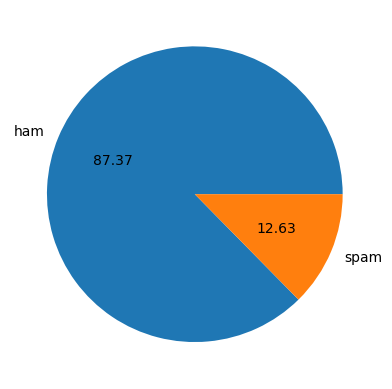

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=('ham', 'spam'), autopct="%0.2f");#autopct used to label the wedges with their numeric value.
plt.show();

# Observation:
## 1 -Data is imbalanced

In [20]:
#!pip install nltk
import nltk

In [21]:
nltk.download('punkt') #Punkt tokenizer divides a text into a list of wrod or sentences

[nltk_data] Downloading package punkt to C:\Users\Sajid
[nltk_data]     Mehar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# number of words
df['num_of_charactors'] = df['text'].apply(len)
df.head()

,target,text,num_of_charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# number of words
df['num_of_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))
df.head()

,target,text,num_of_charactors,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# number of sentance
df['num_of_sent'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_of_charactors', 'num_of_words', 'num_of_sent']].describe()

,num_of_charactors,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham
df[df['target'] == 0][['num_of_charactors', 'num_of_words', 'num_of_sent']].describe()

,num_of_charactors,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# sham
df[df['target'] == 1][['num_of_charactors', 'num_of_words', 'num_of_sent']].describe()

,num_of_charactors,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_charactors', ylabel='Count'>

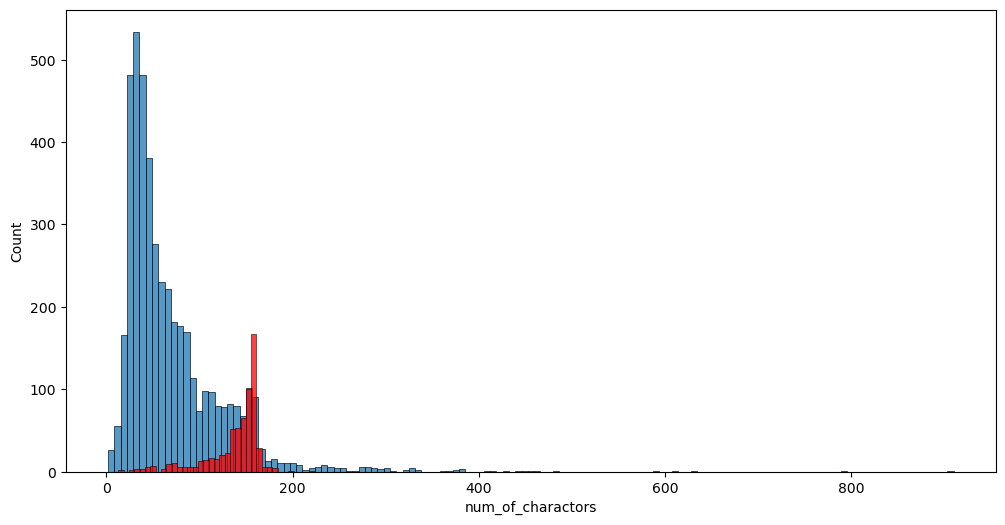

In [28]:
#Plot histograms for num of charactors
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_charactors'])
sns.histplot(df[df['target'] == 1]['num_of_charactors'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

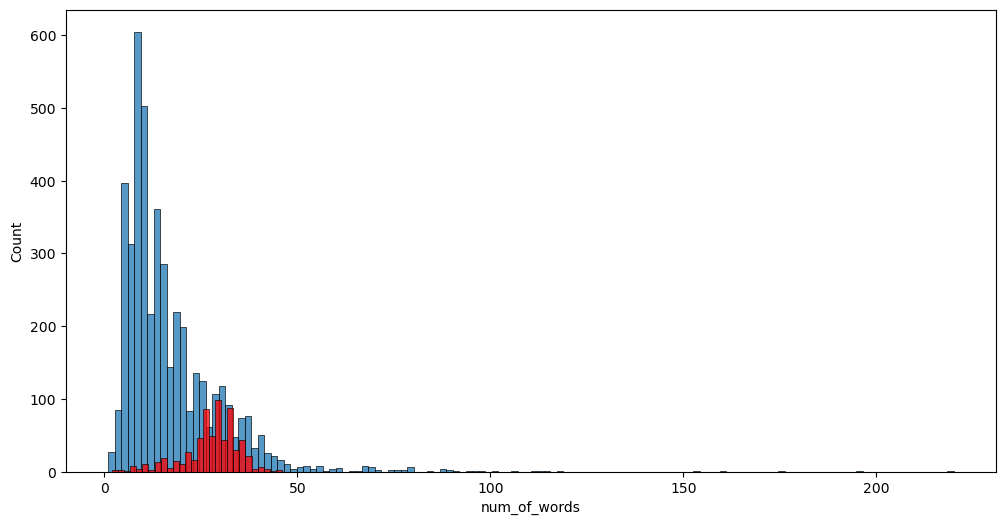

In [29]:
#Plot histograms for num of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'], color='red')


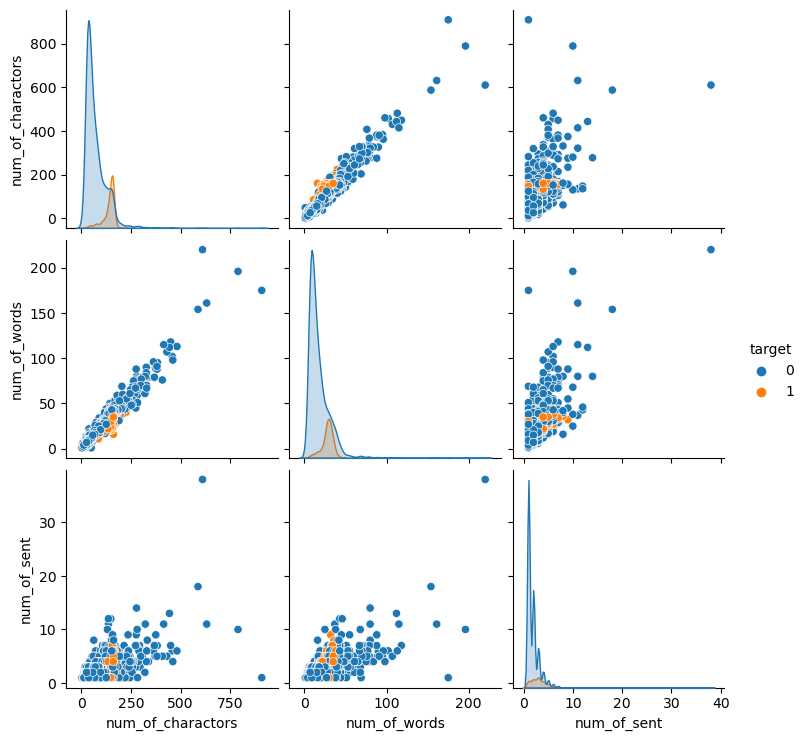

In [30]:
#Plot pairwise relationships between variables within a dataset
sns.pairplot(df,hue='target');

C:\Users\Sajid Mehar\AppData\Local\Temp\ipykernel_7356\3240728658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


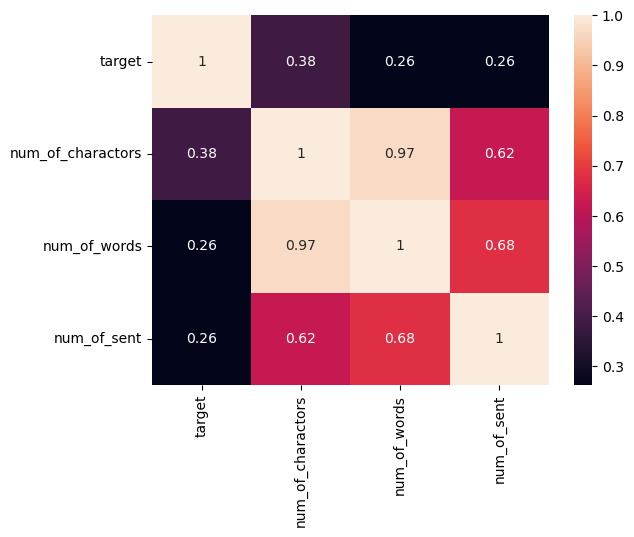

In [31]:
#Plot heatmap color-coded correlation matrix
sns.heatmap(df.corr(), annot=True);

# 3. Data Preprocessing
## Lower case
## Tokenization
## Removing special characters
## Removing stop words and punctuation
## Stemming

In [32]:
#Punctuation
import string  
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
#English Stop Words
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Sajid
[nltk_data]     Mehar\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [35]:
#Create a Function for perfoma all Data Preprocessing Stps
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #Retrun a list of all words 
    
    t = []
    for i in text:
        if i.isalnum():
            t.append(i)
    
    text = t[:] #Save Current Values of t into text
    t.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            t.append(i)
    

    text = t[:] #Save Current Values of t into text
    t.clear()
    
    for i in text:
        t.append(ps.stem(i))
    
    return " ".join(t)               

In [36]:
df['transformed_text'] = df['text'].apply(transform_text)

In [37]:
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
#!pip install wordcloud
#Draw Word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

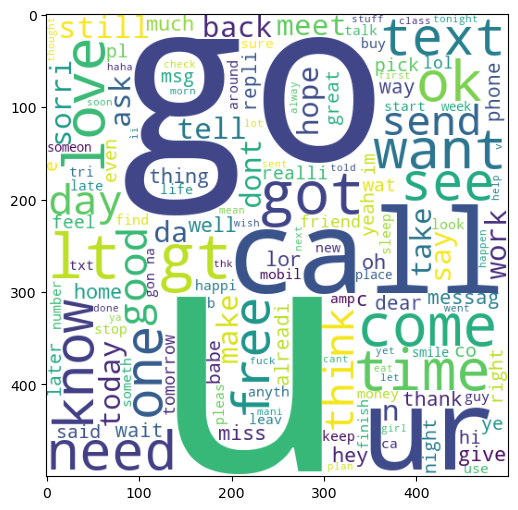

In [39]:
#Complate DataFrame Word cloud
df_wc = wc.generate(df['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(df_wc);

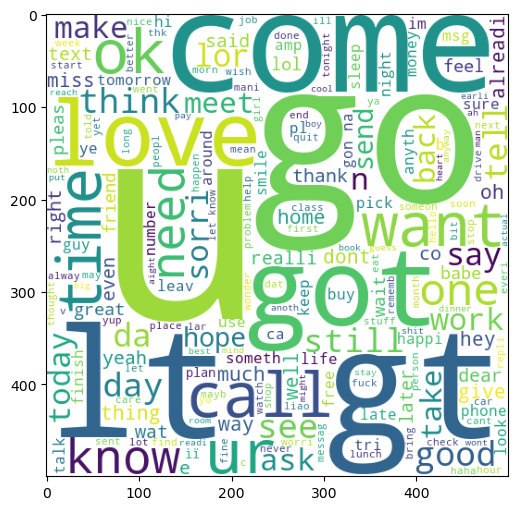

In [40]:
#Word cloud of only Ham (0) Massages
ham_wc =wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep =' '))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc);

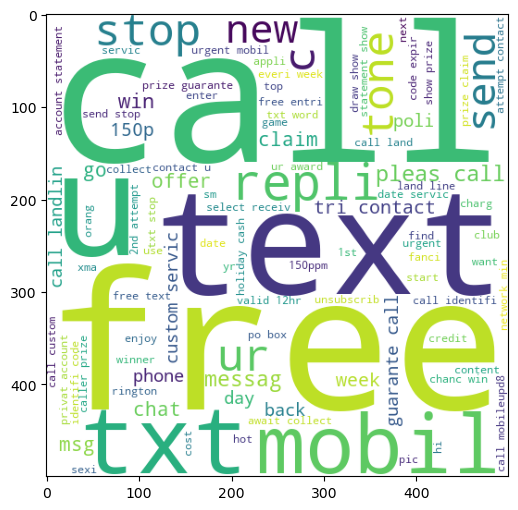

In [41]:
#Word cloud of only Spam (1) Massages
spam_wc =wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep =' '))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc);

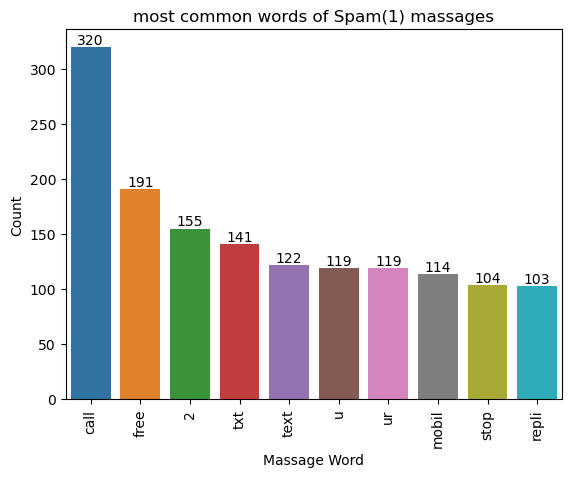

In [42]:
#Count the frequance of words and filter most common words of spam(1) massages 
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
from collections import Counter
ax = sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(10))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(10))[1])
ax.bar_label(ax.containers[0]) # show valus on bars
plt.xticks(rotation = 'vertical')
plt.title("most common words of Spam(1) massages")
plt.xlabel('Massage Word') 
plt.ylabel('Count')
plt.show()

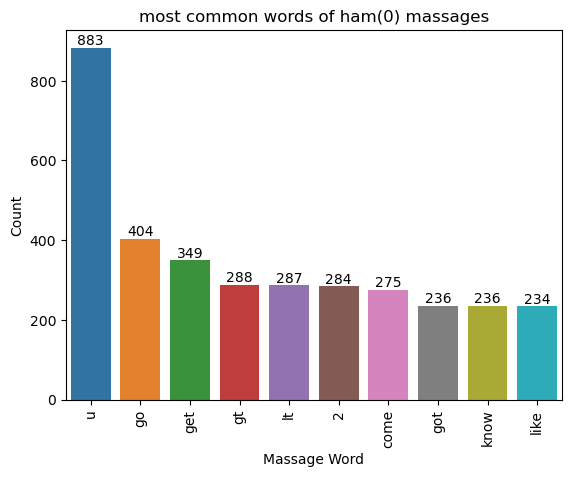

In [43]:
#Count the frequance of words and filter most common words of ham(0) massages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)
ax = sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(10))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(10))[1])
ax.bar_label(ax.containers[0]) # show valus on bars
plt.xticks(rotation = 'vertical')
plt.title("most common words of ham(0) massages")
plt.xlabel('Massage Word') 
plt.ylabel('Count')
plt.show();

In [44]:
#Reload matplotlib for run missing features 
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

# 4. Model Building


In [45]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Let's try CountVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 6708)

In [49]:
y=df['target'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# import naive_bayes models  GaussianNB, MultinomialNB, BernoulliNB

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
#accuracy_score = measures the number of correct predictions made by a model in relation to the total number of predictions made
#confusion_matrix =  confusion matrix is a table that is used to define the performance of a classification algorithm
#precision_score = measures how well a classifier predicts the positive class
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
#Fit the GaussianNB model 
gnb.fit(X_train, y_train)
print(f"gnb score: {gnb.score(X_test, y_test)}")
y_predic1 = gnb.predict(X_test)
print(f"Accuracy Score gnb: {accuracy_score(y_test, y_predic1)}")
print(f"Confusion Matrix gnb: {confusion_matrix(y_test, y_predic1)}")
print(f"Precision Score gnb: {precision_score(y_test, y_predic1)}")    

gnb score: 0.8704061895551257
Accuracy Score gnb: 0.8704061895551257
Confusion Matrix gnb: [[795 118]
 [ 16 105]]
Precision Score gnb: 0.47085201793721976


In [53]:
#Fit the MultinomialNB model 
mnb.fit(X_train, y_train)
print(f"mnb score: {mnb.score(X_test, y_test)}")
y_predic2 = mnb.predict(X_test)
print(f"Accuracy Score mnb: {accuracy_score(y_test, y_predic2)}")
print(f"Confusion Matrix mnb: {confusion_matrix(y_test, y_predic2)}")
print(f"Precision Score mnb: {precision_score(y_test, y_predic2)}")    

mnb score: 0.9738878143133463
Accuracy Score mnb: 0.9738878143133463
Confusion Matrix mnb: [[899  14]
 [ 13 108]]
Precision Score mnb: 0.8852459016393442


In [54]:
#Fit the BernoulliNB model 
bnb.fit(X_train, y_train)
print(f"bnb score: {bnb.score(X_test, y_test)}")
y_predic3 = bnb.predict(X_test)
print(f"Accuracy Score bnb: {accuracy_score(y_test, y_predic3)}")
print(f"Confusion Matrix bnb: {confusion_matrix(y_test, y_predic3)}")
print(f"Precision Score bnb: {precision_score(y_test, y_predic3)}")  

bnb score: 0.9700193423597679
Accuracy Score bnb: 0.9700193423597679
Confusion Matrix bnb: [[910   3]
 [ 28  93]]
Precision Score bnb: 0.96875


# model improve
# 1. Change the max_features parameter of TfIdf

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000)

In [56]:
X=tfid.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [57]:
gnb_tfid = GaussianNB()
mnb_tfid = MultinomialNB()
bnb_tfid = BernoulliNB()

In [58]:
#Fit the GaussianNB model on Tfid
gnb_tfid.fit(X_train, y_train)
print(f"gnb_tfid score: {gnb_tfid.score(X_test, y_test)}")
y_predic1 = gnb_tfid.predict(X_test)
print(f"Accuracy Score gnb_tfid: {accuracy_score(y_test, y_predic1)}")
print(f"Confusion Matrix gnb_tfid: {confusion_matrix(y_test, y_predic1)}")
print(f"Precision Score gnb_tfid: {precision_score(y_test, y_predic1)}")    

gnb_tfid score: 0.8491295938104448
Accuracy Score gnb_tfid: 0.8491295938104448
Confusion Matrix gnb_tfid: [[780 128]
 [ 28  98]]
Precision Score gnb_tfid: 0.4336283185840708


In [59]:
#Fit the MultinomialNB model on Tfid
mnb_tfid.fit(X_train, y_train)
print(f"mnb_tfid score: {mnb_tfid.score(X_test, y_test)}")
y_predic2 = mnb_tfid.predict(X_test)
print(f"Accuracy Score mnb_tfid: {accuracy_score(y_test, y_predic2)}")
print(f"Confusion Matrix mnb_tfid: {confusion_matrix(y_test, y_predic2)}")
print(f"Precision Score mnb_tfid: {precision_score(y_test, y_predic2)}")  

mnb_tfid score: 0.9729206963249516
Accuracy Score mnb_tfid: 0.9729206963249516
Confusion Matrix mnb_tfid: [[907   1]
 [ 27  99]]
Precision Score mnb_tfid: 0.99


In [60]:
#Fit the BernoulliNB model on Tfit 
bnb_tfid.fit(X_train, y_train)
print(f"bnb_tfid score: {bnb_tfid.score(X_test, y_test)}")
y_predic3 = bnb_tfid.predict(X_test)
print(f"Accuracy Score bnb_tfid: {accuracy_score(y_test, y_predic3)}")
print(f"Confusion Matrix bnb_tfid: {confusion_matrix(y_test, y_predic3)}")
print(f"Precision Score bnb_tfid: {precision_score(y_test, y_predic3)}")  

bnb_tfid score: 0.9729206963249516
Accuracy Score bnb_tfid: 0.9729206963249516
Confusion Matrix bnb_tfid: [[905   3]
 [ 25 101]]
Precision Score bnb_tfid: 0.9711538461538461


# Select model : tfidf --> mnb_tfid

## --> Try some other MOdels

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [63]:
#Create Dictinory of Clfs
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [64]:
# Function for Calculate accuracy,precision_score
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_predic = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predic)
    precision = precision_score(y_test, y_predic)
    
    return accuracy, precision      


In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9719626168224299)

In [66]:
accuracy_scores_list = []
precision_scores_list = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores_list.append(current_accuracy)    
    precision_scores_list.append(current_precision)

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9719626168224299
For KN
Accuracy - 0.9235976789168279
Precision - 1.0
For NB
Accuracy - 0.9729206963249516
Precision - 0.99
For DT
Accuracy - 0.9477756286266924
Precision - 0.8913043478260869
For LR
Accuracy - 0.9584139264990329
Precision - 0.9191919191919192
For RF
Accuracy - 0.9690522243713733
Precision - 0.9895833333333334
For AdaBoost
Accuracy - 0.9680851063829787
Precision - 0.9696969696969697
For BgC
Accuracy - 0.9613152804642167
Precision - 0.9056603773584906
For ETC
Accuracy - 0.9690522243713733
Precision - 0.9519230769230769
For GBDT
Accuracy - 0.9564796905222437
Precision - 0.9354838709677419


# Creatig Data Frame

In [67]:
performace_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores_list, 'Precision ':precision_scores_list})

In [68]:
performace_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.971963
1,KN,0.923598,1.000000
2,NB,0.972921,0.990000
3,DT,0.947776,0.891304
4,LR,0.958414,0.919192
5,RF,0.969052,0.989583
6,AdaBoost,0.968085,0.969697
7,BgC,0.961315,0.905660
8,ETC,0.969052,0.951923
9,GBDT,0.956480,0.935484


In [69]:
performance_df1 = pd.melt(performace_df, id_vars = "Algorithm")

In [70]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.923598
2,NB,Accuracy,0.972921
3,DT,Accuracy,0.947776
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.969052
6,AdaBoost,Accuracy,0.968085
7,BgC,Accuracy,0.961315
8,ETC,Accuracy,0.969052
9,GBDT,Accuracy,0.956480


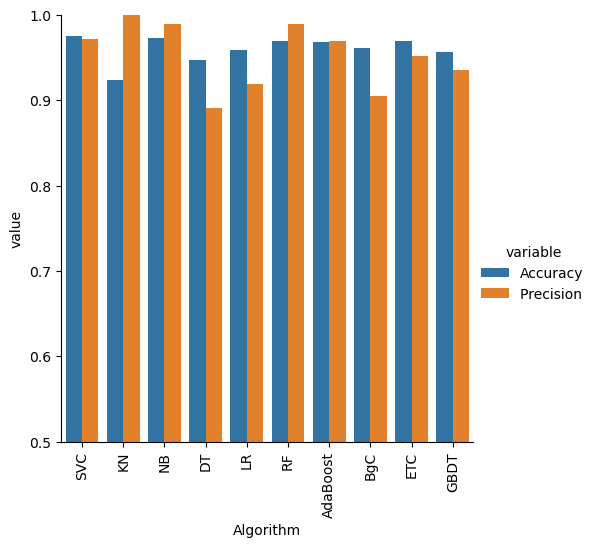

In [71]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9809523809523809


In [74]:
import pickle 
pickle.dump(tfid,open('tfid_Vactorizer.pkl', 'wb'))
pickle.dump(mnb_tfid,open('mnb_tfid.pkl', 'wb'))